# AIML231 Assignment 3
> Shemaiah Rangitaawa `300601546`

This assignment focuses on the design and implementation of a multi-layer perceptron neural network and the use of several machine learning techniques.

## Part One | Linear Regression

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset('mpg')
train, test = train_test_split(df, test_size=0.2, random_state=231)
train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
219,25.5,4,122.0,96.0,2300,15.5,77,usa,plymouth arrow gs
157,15.0,8,350.0,145.0,4440,14.0,75,usa,chevrolet bel air
242,21.5,4,121.0,110.0,2600,12.8,77,europe,bmw 320i
287,16.5,8,351.0,138.0,3955,13.2,79,usa,mercury grand marquis
230,15.5,8,350.0,170.0,4165,11.4,77,usa,chevrolet monte carlo landau


### EDA
> Scatter plots reveal relationships between the variables.

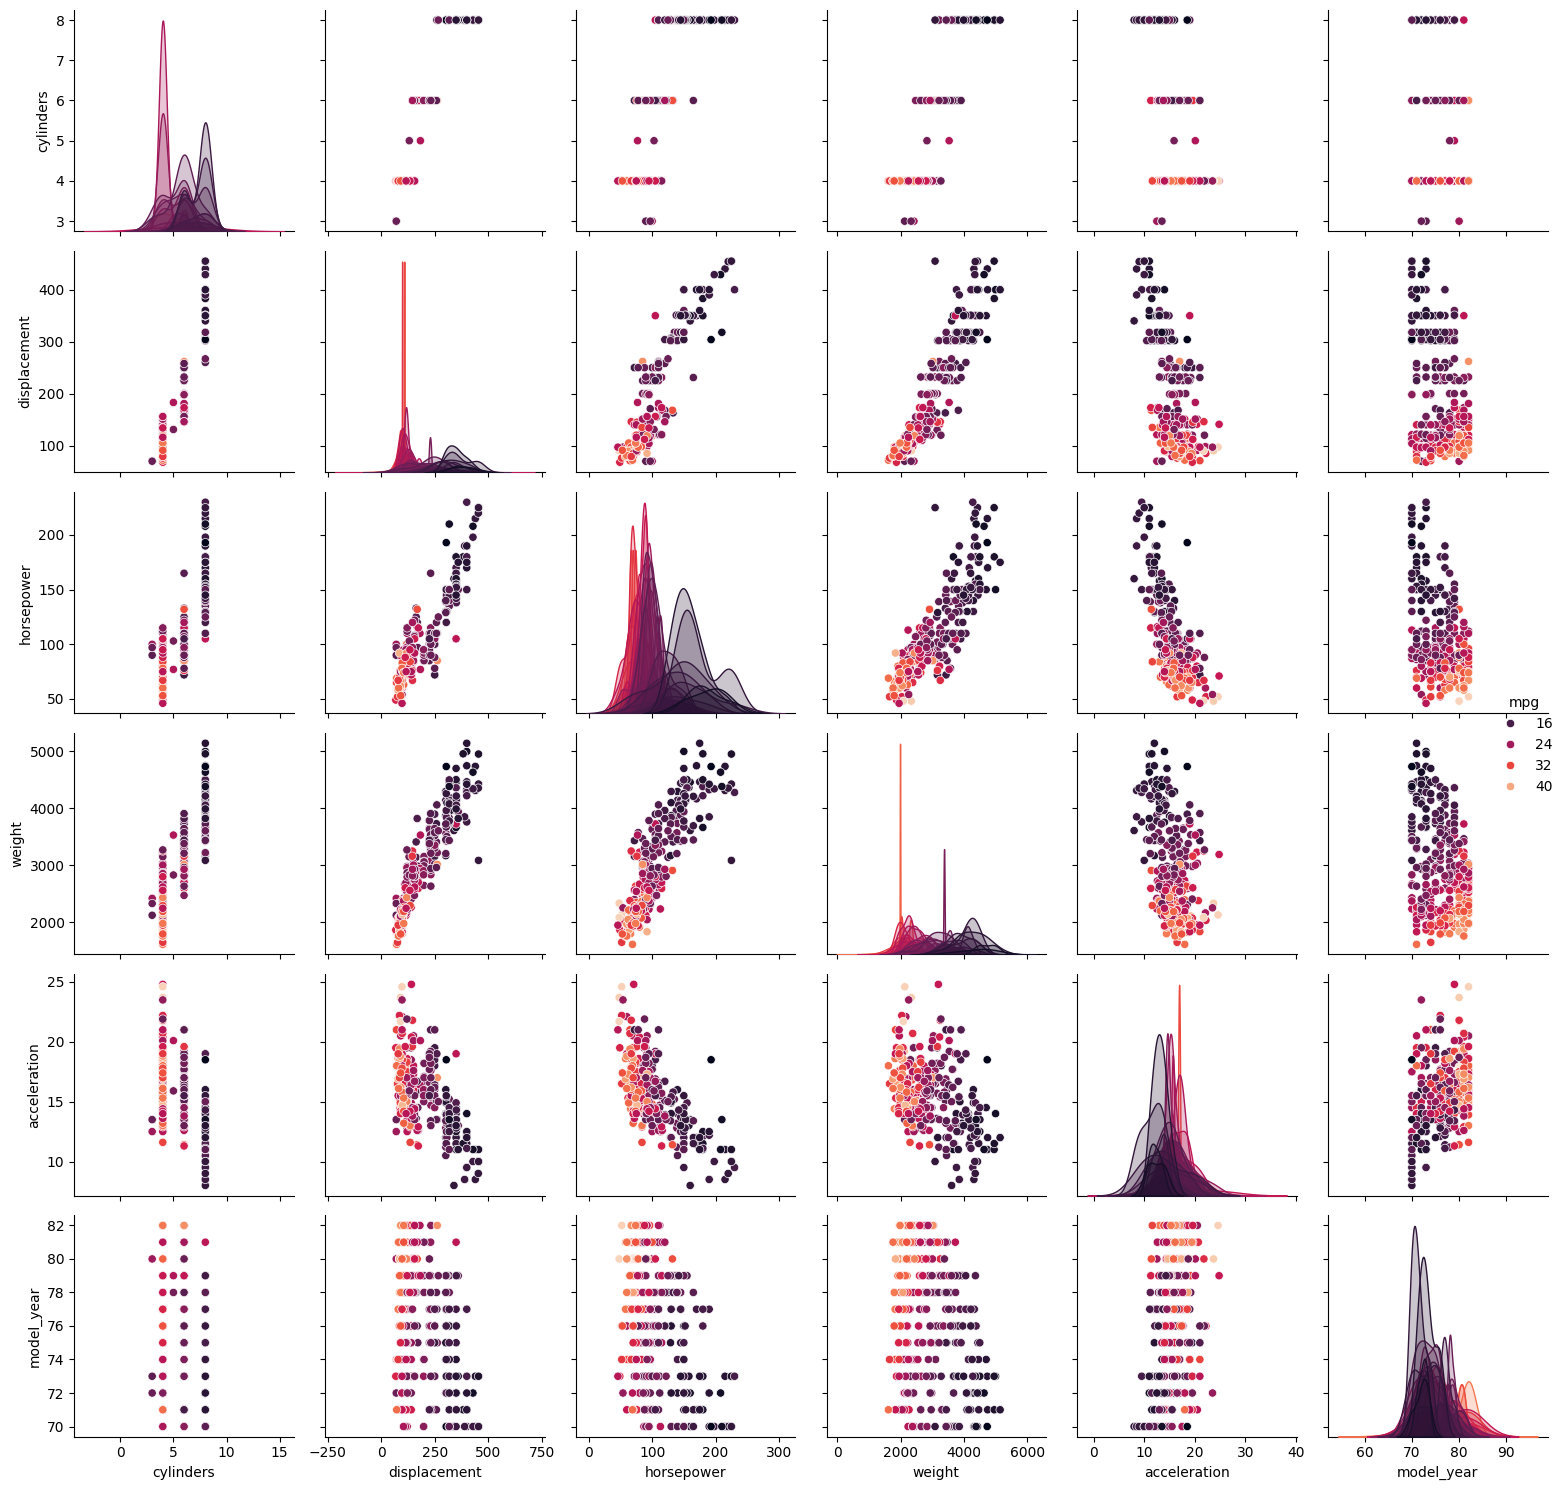

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(train, diag_kind='kde', hue='mpg', palette="rocket")
plt.tight_layout()
plt.show()

> The histograms reveal the distribution of each feature.

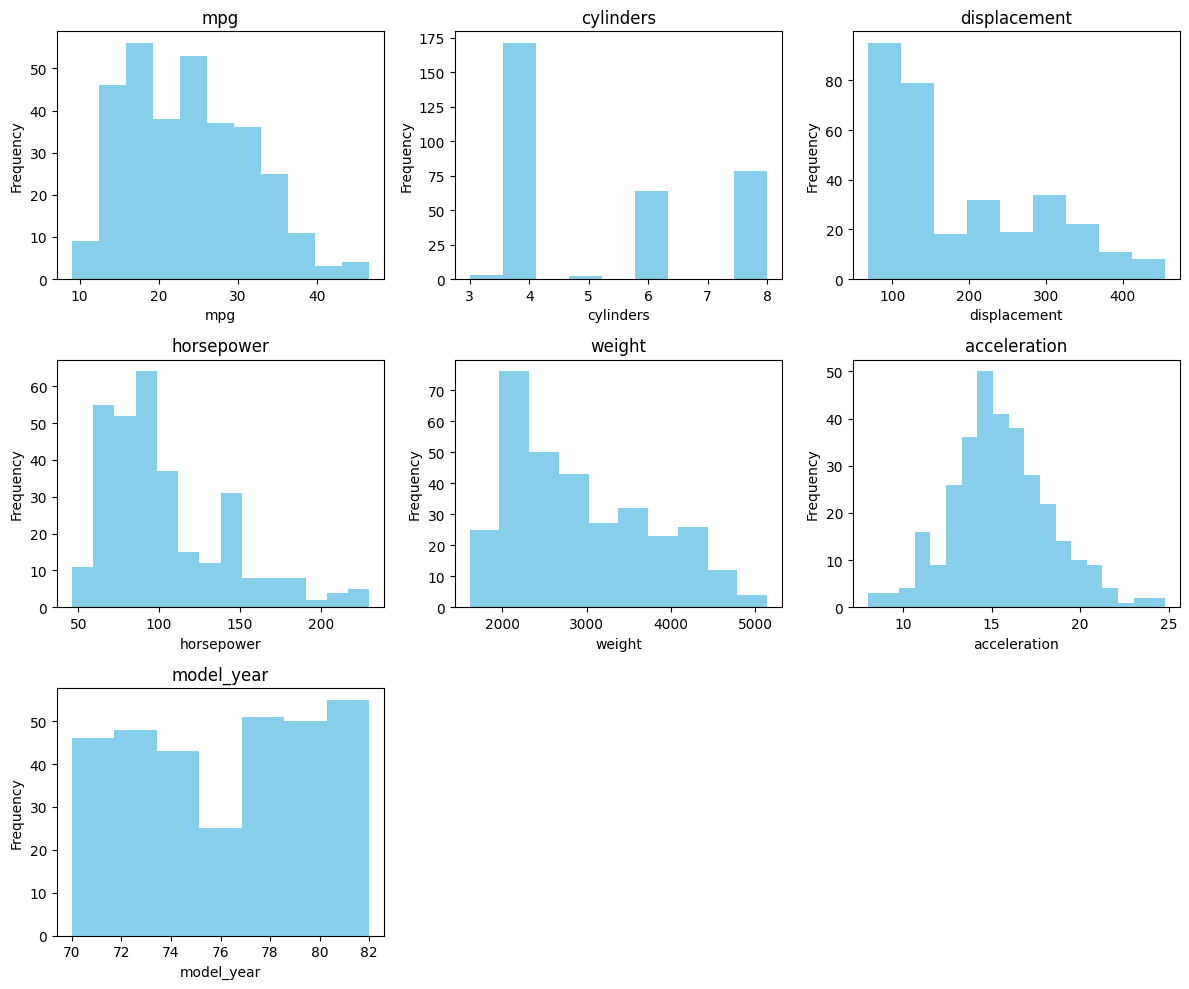

In [4]:
plt.style.use('seaborn-v0_8-muted')
axarr = train.hist(bins='fd', figsize=(12, 10), color='skyblue', grid=False) 
n_cols = len(train.columns)
axes = axarr.flatten()

for i, ax in enumerate(axes):
    ax.set_ylabel('Frequency')
    if i >= len(axes) - n_cols:
        ax.set_xlabel(ax.get_title())

plt.tight_layout()
plt.show()

> There are six missing values in the horsepower feature, I will use median imputation to fill in these values.

### Preprocessing
> Median Imputation was used to fill in the missing values in the dataset.

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Apply the imputer to horsepower
train['horsepower'] = imputer.fit_transform(train[['horsepower']])
test['horsepower'] = imputer.fit_transform(test[['horsepower']])

# Check if any missing values remain
train['horsepower'].isnull().sum(), test['horsepower'].isnull().sum()

(0, 0)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess(train_set, test_set):
    ordinal_enc = OrdinalEncoder()
    onehot_enc = OneHotEncoder(drop='if_binary')
    target_enc = TargetEncoder()

    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', ordinal_enc, ['cylinders']),
            ('onehot', onehot_enc, ['model_year', 'origin']),
            ('target', target_enc, ['name'])
        ],
        remainder='passthrough'  # Other features do not require encoding
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # Fit and transform the train set
    train_prepared = pipeline.fit_transform(train_set, train_set['mpg'])
    test_prepared = pipeline.transform(test_set)

    # Assuming you know the final structure of your transformed data
    columns = ['cylinders', 'model_year', 'origin', 'name_encoded'] + ['other_columns']

    # Convert numpy arrays back to pandas DataFrame
    train_prepared_df = pd.DataFrame(train_prepared, columns=columns)
    test_prepared_df = pd.DataFrame(test_prepared, columns=columns)

    return train_prepared_df, test_prepared_df, pipeline

In [40]:
train_prepared, test_prepared, prep_pipeline = preprocess(train, test)

# Extract features and target variable for training and testing sets
X_train = train_prepared.drop('mpg', axis=1)
y_train = train_prepared['mpg']
X_test = test_prepared.drop('mpg', axis=1)
y_test = test_prepared['mpg']

ValueError: Shape of passed values is (318, 23), indices imply (318, 5)